<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SoftBank Stock data from Stooq.com 
# NTT.com 9613.JP
# reference https://seanmemo.com/234/

from pandas_datareader import data
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = '2022-04-01'
end = '2023-04-18'
code = '9613.JP'
df_ntt = data.DataReader(code, 'stooq', start, end)
# df_ntt2 = data.DataReader('9433.T','yahoo', start, end)


In [2]:
df_ntt

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-18,1825.00,1850.00,1814.00,1846.00,2.780800e+06
2023-04-17,1819.00,1823.00,1807.00,1812.00,1.791200e+06
2023-04-14,1830.00,1830.00,1803.00,1818.00,4.089400e+06
2023-04-13,1793.00,1804.00,1782.00,1798.00,2.221300e+06
2023-04-12,1810.00,1811.00,1792.00,1803.00,2.348600e+06
...,...,...,...,...,...
2022-04-07,2359.60,2382.47,2340.70,2370.53,2.392212e+06
2022-04-06,2384.46,2403.35,2359.60,2394.40,2.392312e+06
2022-04-05,2407.33,2418.26,2387.44,2404.34,2.774370e+06


<AxesSubplot:title={'center':'NTT'}, xlabel='Date'>

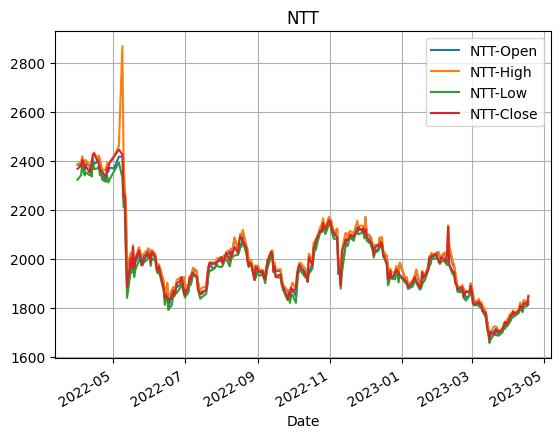

In [3]:
df2 = pd.DataFrame({'NTT-Open':df_ntt['Open'], 'NTT-High':df_ntt['High'], 'NTT-Low':df_ntt['Low'], 'NTT-Close':df_ntt['Close']})
df2.plot(title='NTT', grid=True)




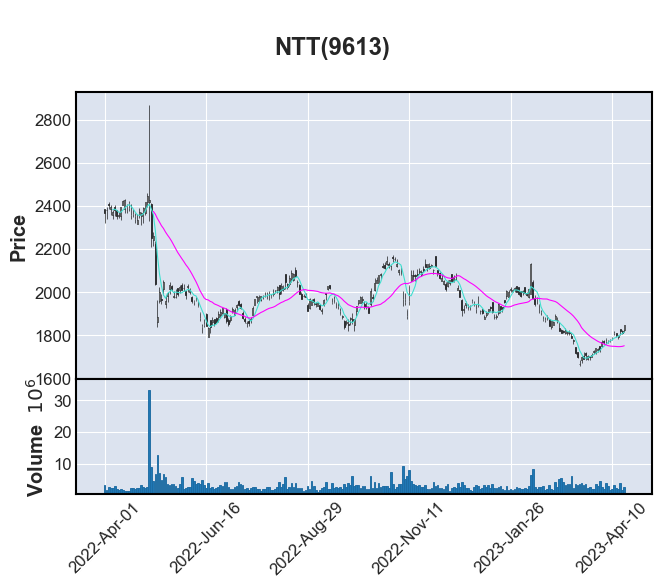

In [4]:
import mplfinance as mpf

start2 = dt.date(2022,9,1)
end2 = dt.date(2023,4,1)
code = '9613.JP'


df = df_ntt.sort_index()
mpf.plot(df, title='\nNTT(9613)', type='candle', mav=(5, 25), volume=True)

In [5]:
# \# MACD計算

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp12 - exp26


In [2]:
from pandas_datareader import data
import datetime as dt
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
# import mplfinance as mpf

#日付取得
end_date = dt.date.today()
start_date = end_date + dt.timedelta(weeks=-52)

code = ['9613.JP','9984.JP'] #ntt_data, softbank
name = ['NTT_Data','SoftBank']
# df_ntt = data.DataReader(code, 'stooq', start, end)

#買った時の１株あたりの単価
price = [0,0]
#保有株数
stock = [0,0]

#取得価格＝保有数量x取得単価
price_buy1 = price[0] * stock[0]
price_buy2 = price[1] * stock[1]
price_buy_sum = price_buy1 + price_buy2 #合計

#各株銘柄取得＆終値取得する関数
def get_kb_Close(code, start_date, end_date):
    df = data.DataReader(code,'stooq', start_date, end_date)
    kb_Close = df['Close']
    return kb_Close

DF = pd.DataFrame()

for i in code:
    DF = pd.concat([DF, get_kb_Close(i, start_date, end_date)], axis=1)
DF.columns = name

DF.index = pd.to_datetime(DF.index) #日付データに変換
print(DF)




            NTT_Data  SoftBank
2023-05-16   1918.00   4999.00
2023-05-15   1920.00   4950.00
2023-05-12   1911.00   4949.00
2023-05-11   1895.00   5138.00
2023-05-10   1878.00   5182.00
...              ...       ...
2022-05-24   2015.55   5167.87
2022-05-23   2033.45   5252.49
2022-05-20   1998.65   5208.69
2022-05-19   1960.86   5032.48
2022-05-18   2049.36   5114.11

[245 rows x 2 columns]


(2734.0, 2786.0)

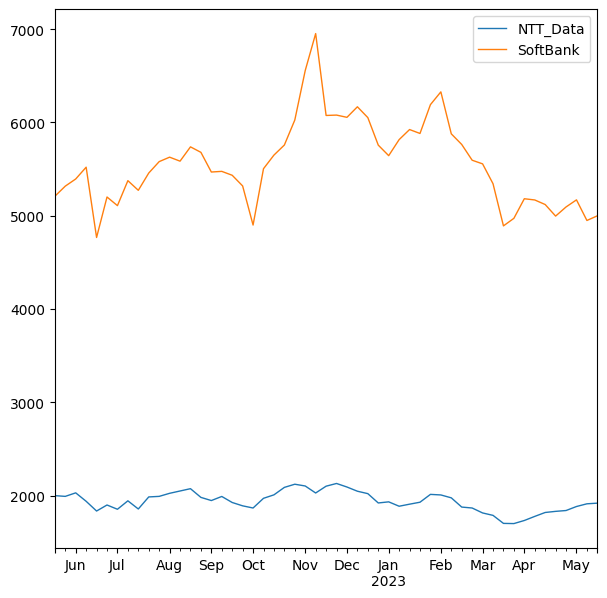

In [3]:
#時価総額(仮)
pr1 = DF[name[0]] * stock[0] #name[0]の株
pr2 = DF[name[1]] * stock[1] #name[1]の株
pr_sum = pr1 + pr2

marketprice = pr_sum.iloc[0] #現在の時価総額(合計)

#損益状況
profit = marketprice - price_buy_sum #実数値 現在の価格-買った時の価格 (合計)
if(price_buy_sum == 0):
    par = 0
else:
    par = round((1 - (marketprice / price_buy_sum))*(-100), 1)#割合

DF_W = pd.DataFrame(DF.resample('W').last())
DF_W.plot(figsize=(7,7), linewidth = 1)

sxmin='2022-05-16'
sxmax='2023-05-16'
xmin = dt.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = dt.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

In [15]:
print(end_date)

2023-05-17


In [14]:
pr1[0]

0.0

In [23]:
print(profit)
print(pr_sum)

6917.0
2023-05-16    6917.00
2023-05-15    6870.00
2023-05-12    6860.00
2023-05-11    7033.00
2023-05-10    7060.00
               ...   
2022-05-24    7183.42
2022-05-23    7285.94
2022-05-20    7207.34
2022-05-19    6993.34
2022-05-18    7163.47
Length: 245, dtype: float64
